# Here i am going to do model creation after combining VP and Manager!!!!

# Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os as os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Checkout the Dataset

In [2]:
df = pd.read_csv("Win_Prediction_Data.csv")

In [3]:
#running head command 

df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
#Dimension of dataset

df.shape

(10061, 9)

In [5]:
#checking null values

df.isnull().sum()

Client_Category    79
Solution_Type       0
Deal_Date           0
Sector              0
Location            0
VP_Name             0
Manager_Name        0
Deal_Cost           0
Deal_Status         0
dtype: int64

## Removing Duplicates Values from dataset

In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [7]:
#Dimension of data set

df.shape

(10047, 9)

## Filling null values of client category with Others

In [8]:
df["Client_Category"].fillna("Others",inplace = True)

##### Total 79 null values of client category is from location 10, and in location 10 modular client category is "Others".

In [9]:
df.isnull().sum()

Client_Category    0
Solution_Type      0
Deal_Date          0
Sector             0
Location           0
VP_Name            0
Manager_Name       0
Deal_Cost          0
Deal_Status        0
dtype: int64

In [10]:
#Statistical information of Deal_Cost

df["Deal_Cost"].describe()

count    1.004700e+04
mean     7.672963e+05
std      1.620881e+06
min      0.000000e+00
25%      1.891176e+05
50%      3.823529e+05
75%      7.647059e+05
max      3.676471e+07
Name: Deal_Cost, dtype: float64

## filling zero deal cost values with median deal cost of all lost deals

In [11]:
def Deal_Cost_Median(Deal_Cost):
    if Deal_Cost == 0:
        return 441176.47
    else:
        return Deal_Cost

In [12]:
df["Deal_Cost"] = df["Deal_Cost"].apply(Deal_Cost_Median)

In [13]:
df["Deal_Cost"].describe()

count    1.004700e+04
mean     7.780546e+05
std      1.617212e+06
min      2.941200e+02
25%      2.058824e+05
50%      4.117647e+05
75%      7.647059e+05
max      3.676471e+07
Name: Deal_Cost, dtype: float64

In [15]:
def Deal_status_Code(Deal_Status):
    if Deal_Status == "Won":
        return 1
    else:
        return 0

In [16]:
df["Deal_Status"] = df["Deal_Status"].apply(Deal_status_Code)

In [17]:
df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


## Removing Internal Client Category

In [18]:
df = df[df["Client_Category"]!="Internal"]

## Combining VP and Manager together

In [19]:
df["VP+Manager"] = df["VP_Name"]+df["Manager_Name"]

In [20]:
#Dropping VP_Name and Manager_Name from dataset

df.drop('VP_Name',axis=1,inplace=True)
df.drop('Manager_Name',axis=1,inplace=True)

In [21]:
df.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,150000.00,1,Ekta ZutshiGopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,744705.88,1,Ekta ZutshiGopa Trilochana
7,Govt,Solution 7,2012-09-17,Sector 13,L5,409705.88,0,Sargar Deep RaoVidur Hukle
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,1032352.94,1,Lilli StorrsMd. Daud
10,International Bank,Solution 6,2012-02-11,Sector 2,L10,316176.47,1,Long BergstromLuv Malhotra


In [22]:
df.to_csv('win_final.csv', index = False)

# Encoding

### Performing Target Guided Ordinal Encoding

In [23]:
col = ['Client_Category', 'Solution_Type', 'Sector', 'Location',
       'VP+Manager']

In [24]:
for feature in col:
    ordinal_labels_1 = df.groupby(feature)['Deal_Status'].mean().sort_values().index
    ordinal_labels_2={k:i for i,k in enumerate(ordinal_labels_1,0)}
    df[feature]=df[feature].map(ordinal_labels_2)

df.head(10)    

,Client_Category,Solution_Type,Deal_Date,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,29,31,2012-03-27,17,11,150000.00,1,593
1,29,31,2012-09-25,17,11,744705.88,1,593
7,16,31,2012-09-17,1,11,409705.88,0,420
8,36,41,2012-04-11,7,6,1032352.94,1,754
10,33,23,2012-02-11,11,6,316176.47,1,511
11,8,27,2012-03-30,11,10,929411.77,1,367
12,20,27,2012-04-26,11,11,2367647.06,1,340
13,19,27,2011-12-20,19,11,8823529.41,0,210
14,20,51,2011-12-22,21,11,122058.82,0,547
15,23,49,2012-01-23,18,12,529411.77,0,435


In [25]:
#Adding Deal Year Column to data set
df['Deal_Year'] = pd.DatetimeIndex(df['Deal_Date']).year

#Adding Deal Month Column to data set
df['Deal_Month'] = pd.DatetimeIndex(df['Deal_Date']).month

#Dropping Deal_Date Column
df.drop("Deal_Date", axis = 1, inplace = True);df.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager,Deal_Year,Deal_Month
0,29,31,17,11,150000.00,1,593,2012,3
1,29,31,17,11,744705.88,1,593,2012,9
7,16,31,1,11,409705.88,0,420,2012,9
8,36,41,7,6,1032352.94,1,754,2012,4
10,33,23,11,6,316176.47,1,511,2012,2


In [26]:
data = df.copy()

data.drop("Deal_Year", axis = 1, inplace = True)
data.drop("Deal_Month", axis = 1, inplace = True)

In [27]:
data.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status,VP+Manager
0,29,31,17,11,150000.00,1,593
1,29,31,17,11,744705.88,1,593
7,16,31,1,11,409705.88,0,420
8,36,41,7,6,1032352.94,1,754
10,33,23,11,6,316176.47,1,511


In [28]:
#Independent and Dependent Feature

X = data.drop("Deal_Status", axis = 1)
Y = data["Deal_Status"]

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

## Feature Selection

In [31]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.0046128 , 0.02605034, 0.00879982, 0.00235506, 0.08181958,
       0.13084881])

In [32]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

VP+Manager         0.130849
Deal_Cost          0.081820
Solution_Type      0.026050
Sector             0.008800
Client_Category    0.004613
Location           0.002355
dtype: float64

<AxesSubplot:>

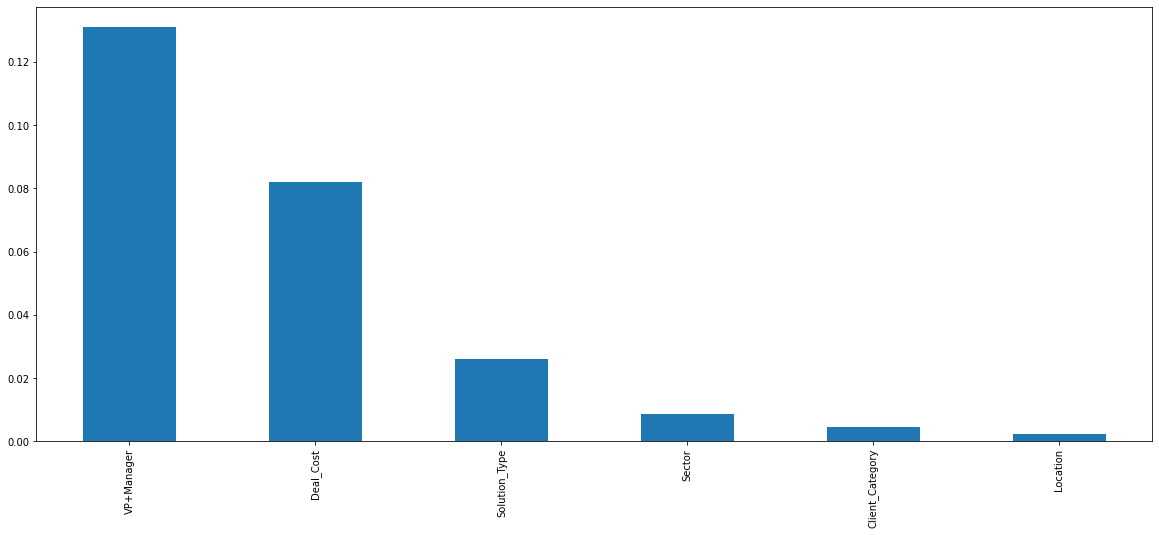

In [33]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

##### This Feature Importance chart has done without combining VP and Manager with complete features

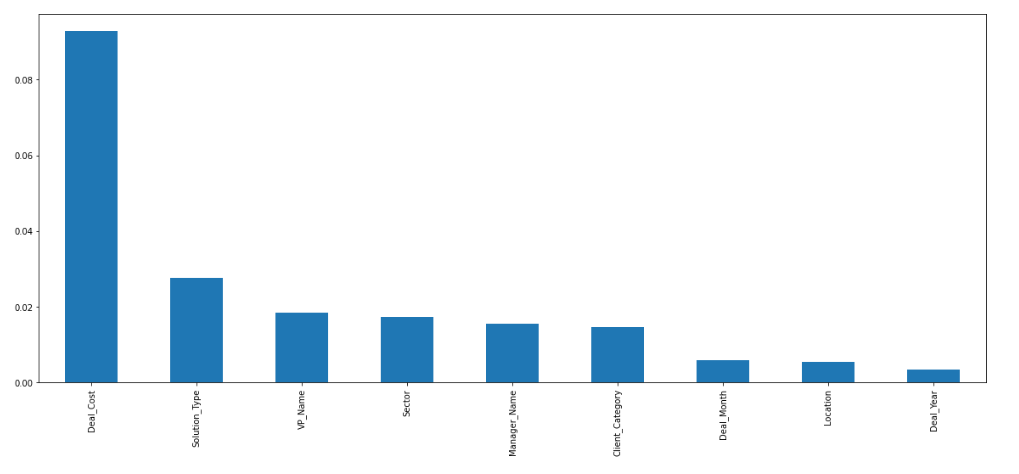

In [34]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [35]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values


Client_Category    6.546006e-86
Solution_Type      0.000000e+00
Sector             9.039976e-32
Location           1.157825e-19
Deal_Cost          0.000000e+00
VP+Manager         0.000000e+00
dtype: float64

In [36]:
stat_values=pd.Series(f_p_values[0])
stat_values.index=X_train.columns
stat_values

Client_Category       385.874680
Solution_Type        1536.421270
Sector                137.572119
Location               82.319360
Deal_Cost            5104.565617
VP+Manager         101385.482682
dtype: float64

In [37]:
p_values.sort_values(ascending=True)

Solution_Type      0.000000e+00
Deal_Cost          0.000000e+00
VP+Manager         0.000000e+00
Client_Category    6.546006e-86
Sector             9.039976e-32
Location           1.157825e-19
dtype: float64

In [38]:
stat_values.sort_values(ascending=False)

VP+Manager         101385.482682
Deal_Cost            5104.565617
Solution_Type        1536.421270
Client_Category       385.874680
Sector                137.572119
Location               82.319360
dtype: float64

## Observation

- VP+Manager, Deal Cost and Solution_Type are most important features

# Models

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#intializing LogisticRegression to object logmodel

logmodel = LogisticRegression()

In [60]:
##Hyperparameter Optimization

from sklearn.model_selection import RandomizedSearchCV

# Create params

params = {'penalty' : ['l1', 'l2'], 
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear','sag','saga']}

In [61]:
log_randomcv = RandomizedSearchCV(logmodel,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [62]:
log_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.0s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='roc_auc', verbose=3)

In [63]:
lg_model = log_randomcv.best_estimator_

In [64]:
#prediction
lg_prediction = lg_model.predict(X_test)

# Evaluation Metrics

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [66]:
print(confusion_matrix(y_test,lg_prediction))
print(accuracy_score(y_test,lg_prediction))
print(classification_report(y_test,lg_prediction))

[[968 149]
 [278 325]]
0.7517441860465116
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1117
           1       0.69      0.54      0.60       603

    accuracy                           0.75      1720
   macro avg       0.73      0.70      0.71      1720
weighted avg       0.74      0.75      0.74      1720



In [67]:
lg_model.score(X_train,y_train)

0.7502908667830134

## Xgboost

In [49]:
import xgboost
classifier=xgboost.XGBClassifier()

In [50]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [51]:
xg_randomcv = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [52]:
xg_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.1s finished


[14:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [53]:
#best model from random search cv
xg_model = xg_randomcv.best_estimator_

In [54]:
#making prediction
xg_predictions = xg_model.predict(X_test)

In [55]:
xg_predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Evaluation Metrics

In [56]:
print(confusion_matrix(y_test,xg_predictions))
print(accuracy_score(y_test,xg_predictions))
print(classification_report(y_test,xg_predictions))

[[1047   70]
 [ 238  365]]
0.8209302325581396
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1117
           1       0.84      0.61      0.70       603

    accuracy                           0.82      1720
   macro avg       0.83      0.77      0.79      1720
weighted avg       0.82      0.82      0.81      1720



##### This is the best result, i get till now. 

In [57]:
xg_model.score(X_train,y_train)

0.9390634089586969

In [67]:
report = pd.DataFrame(y_test)

In [68]:
report["Prediction"]= xg_predictions

In [69]:
report["Deal Cost"] = X_test["Deal_Cost"]

In [70]:
report.to_csv("report1.csv")